In [43]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

### Importing 311 data

In [94]:
street_lights = pd.read_csv("C:/Users/omhai/OneDrive/Desktop/Shetty/Capstone Project/311_Service_Requests_from_2010_to_Present.csv")
street_lights.head()

C:\Users\omhai\AppData\Local\Temp\ipykernel_9424\3190843042.py:1: DtypeWarning: Columns (0,8,17,31) have mixed types. Specify dtype option on import or set low_memory=False.
  street_lights = pd.read_csv("C:/Users/omhai/OneDrive/Desktop/Shetty/Capstone Project/311_Service_Requests_from_2010_to_Present.csv")


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37602709,11/03/2017 11:07:31 PM,11/04/2017 05:29:23 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453.0,87 WEST 174 STREET,WEST 174 STREET,MACOMBS ROAD,NELSON AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,11/04/2017 07:07:31 AM,The Police Department issued a summons in resp...,11/04/2017 05:29:23 AM,05 BRONX,2.028760e+09,BRONX,1007181.0,247932.0,MOBILE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847161,-73.917117,"(40.847161366206926, -73.9171174809742)"
1,37602710,11/03/2017 08:38:16 AM,11/03/2017 01:39:42 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11101.0,43-20 35 STREET,35 STREET,43 AVENUE,QUEENS BOULEVARD,NaN,NaN,ADDRESS,LONG ISLAND CITY,NaN,Precinct,Closed,11/03/2017 04:38:16 PM,The Police Department issued a summons in resp...,11/03/2017 01:39:42 PM,02 QUEENS,4.002420e+09,QUEENS,1003762.0,210974.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745730,-73.929583,"(40.74572995397859, -73.9295825986212)"
2,37602711,11/03/2017 12:50:38 PM,11/03/2017 03:44:41 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11102.0,30-38 14 STREET,14 STREET,30 ROAD,30 DRIVE,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,11/03/2017 08:50:38 PM,The Police Department responded and upon arriv...,11/03/2017 03:44:41 PM,01 QUEENS,4.005160e+09,QUEENS,1003441.0,219770.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769873,-73.930716,"(40.769873422034465, -73.93071595633613)"
3,37602712,11/03/2017 08:36:07 PM,11/03/2017 11:19:01 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11368.0,50-32 103 STREET,103 STREET,CHRISTIE AVENUE,RADCLIFF AVENUE,NaN,NaN,ADDRESS,CORONA,NaN,Precinct,Closed,11/04/2017 04:36:07 AM,The Police Department reviewed your complaint ...,11/03/2017 11:19:01 PM,04 QUEENS,4.019330e+09,QUEENS,1023235.0,209962.0,MOBILE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742888,-73.859312,"(40.742887864582464, -73.85931190187793)"
4,37602713,11/03/2017 09:52:53 AM,11/03/2017 02:30:22 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,10461.0,1872 MULFORD AVENUE,MULFORD AVENUE,LAURIE AVENUE,ST THERESA AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,11/03/2017 05:52:53 PM,The Police Department responded to the complai...,11/03/2017 02:30:22 PM,10 BRONX,2.041910e+09,BRONX,1029913.0,248650.0,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.849044,-73.834949,"(40.8490437653976, -73.83494948999639)"


In [96]:
street_lights["Complaint Type"].unique()

array(['Blocked Driveway', 'Graffiti', 'Noise - Residential',
       'Street Condition', 'Damaged Tree', 'Building/Use', 'Elevator',
       'Street Light Condition', 'Rodent',
       'Request Large Bulky Item Collection', 'Noise - Vehicle',
       'Literature Request', 'Noise - Commercial', 'Taxi Complaint',
       'General Construction/Plumbing', 'Plumbing',
       'Missed Collection (All Materials)', 'Dead/Dying Tree', 'Drinking',
       'Curb Condition', 'Sidewalk Condition',
       'Special Projects Inspection Team (SPIT)', 'Dirty Conditions',
       'Traffic Signal Condition', 'Electronics Waste',
       'Benefit Card Replacement', 'Other Enforcement',
       'Sanitation Condition', 'Derelict Vehicle', 'Homeless Encampment',
       'Noise - Street/Sidewalk', 'Noise - House of Worship', 'DRIE',
       'Taxi Report', 'Non-Emergency Police Matter', 'Animal in a Park',
       'Public Payphone Complaint', 'Derelict Vehicles', 'Noise',
       'Sweeping/Inadequate', 'Overgrown Tree/Branc

### Street Light and Sidewalk Condition complaints filtered

In [97]:
street_lights=street_lights[(street_lights["Complaint Type"]=="Street Light Condition") | (street_lights["Complaint Type"]=="Sidewalk Condition")]

In [98]:
street_lights.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
42,37602755,11/03/2017 10:15:00 AM,11/03/2017 10:15:00 AM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,NaN,NaN,NaN,NaN,NaN,GERRITSEN AVE,AVE S,INTERSECTION,NaN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/02/2017 10:15:00 AM,Unspecified BROOKLYN,NaN,BROOKLYN,NaN,NaN,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,37602782,11/03/2017 10:44:00 AM,11/03/2017 10:44:00 AM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,11205.0,NaN,NaN,NaN,NaN,DE KALB AVENUE,NOSTRAND AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/02/2017 10:44:00 AM,Unspecified BROOKLYN,NaN,BROOKLYN,997628.0,191150.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691329,-73.951759,"(40.69132925572063, -73.95175915670987)"
198,37602931,11/03/2017 05:28:07 PM,11/16/2017 05:05:23 PM,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,10128.0,1380 LEXINGTON AVENUE,LEXINGTON AVENUE,EAST 91 STREET,EAST 92 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,12/03/2017 05:28:07 PM,The Department of Transportation will inspect ...,11/16/2017 05:05:23 PM,08 MANHATTAN,1.015200e+09,MANHATTAN,997210.0,224469.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.782782,-73.953202,"(40.78278227043394, -73.95320226996137)"
199,37602932,11/03/2017 12:52:59 PM,11/13/2017 03:13:41 PM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11230.0,1211 GLENWOOD ROAD,GLENWOOD ROAD,EAST 12 STREET,EAST 13 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,12/03/2017 12:52:59 PM,The Department of Transportation has approved ...,11/13/2017 03:13:41 PM,14 BROOKLYN,3.052330e+09,BROOKLYN,993874.0,169557.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632066,-73.965327,"(40.632066123958566, -73.96532683646818)"
204,37602947,11/03/2017 11:50:46 AM,11/24/2017 11:14:56 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10312.0,10 CORTELYOU AVENUE,CORTELYOU AVENUE,ARTHUR KILL ROAD,EAST BRANDIS AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,12/03/2017 11:50:46 AM,The Department of Transportation inspected the...,11/24/2017 11:14:56 AM,03 STATEN ISLAND,5.054940e+09,STATEN ISLAND,938436.0,143271.0,PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.559803,-74.164879,"(40.55980323808386, -74.16487936496246)"


### Merging with Zipcode Shapefile

In [99]:
geometry = [Point(xy) for xy in zip(street_lights['Longitude'], street_lights['Latitude'])]
# create a geopandas dataframe with the geometry column
lights_gdf = gpd.GeoDataFrame(street_lights, geometry=geometry)

In [100]:
lights_gdf.crs = {'init': 'epsg:4326'}

C:\Users\omhai\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [101]:
lights_gdf.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
42,37602755,11/03/2017 10:15:00 AM,11/03/2017 10:15:00 AM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,NaN,NaN,NaN,NaN,NaN,GERRITSEN AVE,AVE S,INTERSECTION,NaN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/02/2017 10:15:00 AM,Unspecified BROOKLYN,NaN,BROOKLYN,NaN,NaN,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
67,37602782,11/03/2017 10:44:00 AM,11/03/2017 10:44:00 AM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,11205.0,NaN,NaN,NaN,NaN,DE KALB AVENUE,NOSTRAND AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/02/2017 10:44:00 AM,Unspecified BROOKLYN,NaN,BROOKLYN,997628.0,191150.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691329,-73.951759,"(40.69132925572063, -73.95175915670987)",POINT (-73.95176 40.69133)
198,37602931,11/03/2017 05:28:07 PM,11/16/2017 05:05:23 PM,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,10128.0,1380 LEXINGTON AVENUE,LEXINGTON AVENUE,EAST 91 STREET,EAST 92 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,12/03/2017 05:28:07 PM,The Department of Transportation will inspect ...,11/16/2017 05:05:23 PM,08 MANHATTAN,1.015200e+09,MANHATTAN,997210.0,224469.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.782782,-73.953202,"(40.78278227043394, -73.95320226996137)",POINT (-73.95320 40.78278)
199,37602932,11/03/2017 12:52:59 PM,11/13/2017 03:13:41 PM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11230.0,1211 GLENWOOD ROAD,GLENWOOD ROAD,EAST 12 STREET,EAST 13 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,12/03/2017 12:52:59 PM,The Department of Transportation has approved ...,11/13/2017 03:13:41 PM,14 BROOKLYN,3.052330e+09,BROOKLYN,993874.0,169557.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632066,-73.965327,"(40.632066123958566, -73.96532683646818)",POINT (-73.96533 40.63207)
204,37602947,11/03/2017 11:50:46 AM,11/24/2017 11:14:56 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10312.0,10 CORTELYOU AVENUE,CORTELYOU AVENUE,ARTHUR KILL ROAD,EAST BRANDIS AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,12/03/2017 11:50:46 AM,The Department of Transportation inspected the...,11/24/2017 11:14:56 AM,03 STATEN ISLAND,5.054940e+09,STATEN ISLAND,938436.0,143271.0,PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.559803,-74.164879,"(40.55980323808386, -74.16487936496246)",POINT (-74.16488 40.55980)


In [102]:
## zip codes map
zips = gpd.read_file("C:/Users/omhai/OneDrive/Desktop/Shetty/Principles of Urban Informatics/Assignments/Midterm_Akshay Shetty/ZIP_CODE_040114")
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [103]:
zips = zips.to_crs(epsg=4326)

In [106]:
result = gpd.sjoin(lights_gdf, zips, op='within')
result.head()

C:\Users\omhai\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\omhai\AppData\Local\Temp\ipykernel_9424\3189187764.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  result = gpd.sjoin(lights_gdf, zips, op='within')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry,index_right,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
67,37602782,11/03/2017 10:44:00 AM,11/03/2017 10:44:00 AM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,11205.0,NaN,NaN,NaN,NaN,DE KALB AVENUE,NOSTRAND AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/02/2017 10:44:00 AM,Unspecified BROOKLYN,NaN,BROOKLYN,997628.0,191150.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691329,-73.951759,"(40.69132925572063, -73.95175915670987)",POINT (-73.95176 40.69133),110,11205,0,Brooklyn,41125.0,2.327015e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
31010,37638408,11/08/2017 04:43:53 PM,11/14/2017 10:03:05 AM,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,11205.0,187 WAVERLY AVENUE,WAVERLY AVENUE,MYRTLE AVENUE,WILLOUGHBY AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,12/08/2017 04:43:53 PM,The Department of Transportation will inspect ...,11/14/2017 10:03:05 AM,02 BROOKLYN,3.019030e+09,BROOKLYN,993218.0,191521.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692353,-73.967661,"(40.692353132352004, -73.96766104694174)",POINT (-73.96766 40.69235),110,11205,0,Brooklyn,41125.0,2.327015e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
38773,37647688,11/09/2017 09:43:00 AM,11/09/2017 09:43:00 AM,DOT,Department of Transportation,Street Light Condition,Fixture/Luminaire Out Of Position,NaN,11205,NaN,NaN,SANDFORD ST,MYRTLE AVE,SANDFORD STREET,MYRTLE AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/08/2017 09:43:00 AM,03 BROOKLYN,NaN,BROOKLYN,997168.0,192448.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694893,-73.953415,"(40.694892648404824, -73.95341541952014)",POINT (-73.95342 40.69489),110,11205,0,Brooklyn,41125.0,2.327015e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
38822,37647765,11/09/2017 09:43:00 AM,11/09/2017 09:43:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11205,NaN,NaN,PARK AVE,WALWORTH ST,PARK AVENUE,WALWORTH STREET,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/08/2017 09:43:00 AM,03 BROOKLYN,NaN,BROOKLYN,996799.0,193214.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.696996,-73.954745,"(40.696995671149274, -73.95474467109089)",POINT (-73.95474 40.69700),110,11205,0,Brooklyn,41125.0,2.327015e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
39268,37648310,11/09/2017 09:42:00 AM,11/09/2017 09:42:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11205,NaN,NaN,WALWORTH ST,MYRTLE AVE,WALWORTH STREET,MYRTLE AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,11/08/2017 09:42:00 AM,03 BROOKLYN,NaN,BROOKLYN,996921.0,192411.0,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694791,-73.954306,"(40.69479144909162, -73.95430621440917)",POINT (-73.95431 40.69479),110,11205,0,Brooklyn,41125.0,2.327015e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0


In [107]:
result["Complaint Type"].value_counts()

Street Light Condition    6702
Sidewalk Condition        3812
Name: Complaint Type, dtype: int64

In [109]:
result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10514 entries, 67 to 279402
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unique Key                      10514 non-null  object  
 1   Created Date                    10514 non-null  object  
 2   Closed Date                     10511 non-null  object  
 3   Agency                          10514 non-null  object  
 4   Agency Name                     10514 non-null  object  
 5   Complaint Type                  10514 non-null  object  
 6   Descriptor                      10514 non-null  object  
 7   Location Type                   3812 non-null   object  
 8   Incident Zip                    10514 non-null  object  
 9   Incident Address                5040 non-null   object  
 10  Street Name                     5040 non-null   object  
 11  Cross Street 1                  8163 non-null   object  
 12  Cross St

In [108]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [110]:
result_df = result[["Created Date","Descriptor","Complaint Type","ZIPCODE","geometry"]]
result_df.head()

,Created Date,Descriptor,Complaint Type,ZIPCODE,geometry
67,11/03/2017 10:44:00 AM,Fixture/Luminaire Out Of Position,Street Light Condition,11205,POINT (-73.95176 40.69133)
31010,11/08/2017 04:43:53 PM,Broken Sidewalk,Sidewalk Condition,11205,POINT (-73.96766 40.69235)
38773,11/09/2017 09:43:00 AM,Fixture/Luminaire Out Of Position,Street Light Condition,11205,POINT (-73.95342 40.69489)
38822,11/09/2017 09:43:00 AM,Street Light Out,Street Light Condition,11205,POINT (-73.95474 40.69700)
39268,11/09/2017 09:42:00 AM,Street Light Out,Street Light Condition,11205,POINT (-73.95431 40.69479)


### Getting count for both complaint types

In [111]:
pivot_df = pd.pivot_table(result_df, index='ZIPCODE', columns='Complaint Type', values='Created Date', aggfunc='count')
pivot_df.head()

Complaint Type,Sidewalk Condition,Street Light Condition
ZIPCODE,,
00083,NaN,5.0
10001,10.0,2.0
10002,38.0,49.0
10003,20.0,11.0
10004,2.0,6.0


In [112]:
pivot_df.reset_index(inplace=True)

In [115]:
pivot_df=pivot_df.fillna(0)

In [116]:
import matplotlib.pyplot as plt

In [123]:
zips_gdf = pivot_df.merge(zips,on="ZIPCODE")

In [124]:
zips_gdf.head()

,ZIPCODE,Sidewalk Condition,Street Light Condition,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,00083,0.0,5.0,0,Central Park,25.0,3.830099e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.94922 40.79691, -73.94932 40.796..."
1,10001,10.0,2.0,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
2,10002,38.0,49.0,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97442 40.73642, -73.97445 40.736..."
3,10003,20.0,11.0,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97986 40.73497, -73.98028 40.734..."
4,10004,2.0,6.0,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.01101 40.70622, -74.00997 40.705..."


### Normalization

In [125]:
zips_gdf["Sidewalk Condition"] = zips_gdf["Sidewalk Condition"]/zips_gdf["POPULATION"]
zips_gdf["Street Light Condition"] = zips_gdf["Street Light Condition"]/zips_gdf["POPULATION"]

In [126]:
zips_gdf.head()

,ZIPCODE,Sidewalk Condition,Street Light Condition,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,00083,0.000000,0.200000,0,Central Park,25.0,3.830099e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.94922 40.79691, -73.94932 40.796..."
1,10001,0.000446,0.000089,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
2,10002,0.000467,0.000603,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97442 40.73642, -73.97445 40.736..."
3,10003,0.000358,0.000197,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97986 40.73497, -73.98028 40.734..."
4,10004,0.000914,0.002743,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-74.01101 40.70622, -74.00997 40.705..."


In [127]:
cols = ["ZIPCODE","Sidewalk Condition","Street Light Condition","geometry"]

In [128]:
zips_gdf = zips_gdf[cols]
zips_gdf.head()

,ZIPCODE,Sidewalk Condition,Street Light Condition,geometry
0,00083,0.000000,0.200000,"POLYGON ((-73.94922 40.79691, -73.94932 40.796..."
1,10001,0.000446,0.000089,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
2,10002,0.000467,0.000603,"POLYGON ((-73.97442 40.73642, -73.97445 40.736..."
3,10003,0.000358,0.000197,"POLYGON ((-73.97986 40.73497, -73.98028 40.734..."
4,10004,0.000914,0.002743,"POLYGON ((-74.01101 40.70622, -74.00997 40.705..."


In [138]:
zips_gdf["ZIPCODE"]

0      00083
1      10001
2      10002
3      10003
4      10004
5      10004
6      10004
7      10004
8      10005
9      10006
10     10007
11     10009
12     10010
13     10011
14     10012
15     10013
16     10014
17     10016
18     10017
19     10018
20     10019
21     10021
22     10022
23     10023
24     10024
25     10025
26     10026
27     10027
28     10028
29     10029
30     10030
31     10031
32     10032
33     10033
34     10034
35     10035
36     10035
37     10036
38     10037
39     10038
40     10039
41     10040
42     10044
43     10065
44     10075
45     10128
46     10280
47     10281
48     10301
49     10302
50     10303
51     10304
52     10305
53     10306
54     10307
55     10308
56     10309
57     10310
58     10312
59     10314
60     10451
61     10452
62     10453
63     10454
64     10455
65     10456
66     10457
67     10458
68     10459
69     10460
70     10461
71     10462
72     10463
73     10463
74     10464
75     10464
76     10464

In [139]:
zips_gdf.head()

,ZIPCODE,Sidewalk Condition,Street Light Condition,geometry
0,00083,0.000000,0.200000,"POLYGON ((998309.725 229616.681, 998282.853 22..."
1,10001,0.000446,0.000089,"POLYGON ((981958.647 213464.453, 981980.328 21..."
2,10002,0.000467,0.000603,"POLYGON ((991339.870 207576.784, 991330.490 20..."
3,10003,0.000358,0.000197,"POLYGON ((989830.469 207048.126, 989716.354 20..."
4,10004,0.000914,0.002743,"POLYGON ((981197.409 196571.082, 981485.049 19..."


In [141]:
zips_gdf = zips_gdf.iloc[:,:3]

In [142]:
zips_gdf.head()

,ZIPCODE,Sidewalk Condition,Street Light Condition
0,00083,0.000000,0.200000
1,10001,0.000446,0.000089
2,10002,0.000467,0.000603
3,10003,0.000358,0.000197
4,10004,0.000914,0.002743


In [129]:
zips_gdf.to_csv("311_sidewalk_complaints.csv")

### Visualization

In [130]:
zips_gdf = gpd.GeoDataFrame(zips_gdf, geometry='geometry')

In [137]:
import folium
from branca.colormap import LinearColormap

# Convert the GeoDataFrame to the desired CRS
zips_gdf = zips_gdf.to_crs('epsg:2263')

# Center the map in New York City
ny_coords = [40.7128, -74.0060]
m = folium.Map(location=ny_coords, zoom_start=12)
#m = folium.Map(location=center, zoom_start=10)

# Define the color map for the legend
colors = ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#084594']
cmap = LinearColormap(colors=colors, vmin=zips_gdf['Sidewalk Condition'].quantile(0), vmax=zips_gdf['Sidewalk Condition'].quantile(1))

# Plot the data on the map
folium.GeoJson(
    zips_gdf,
    name='Sidewalk Condition',
    style_function=lambda feature: {
        'fillColor': cmap(feature['properties']['Sidewalk Condition']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.9
    }
).add_to(m)

# Add the legend to the map
cmap.add_to(m)
m.add_child(folium.LayerControl())

# Display the map
m

# Save the map as an HTML file
m.save('Sidewalk Condition Complaints by Zipcode.html')

C:\Users\omhai\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


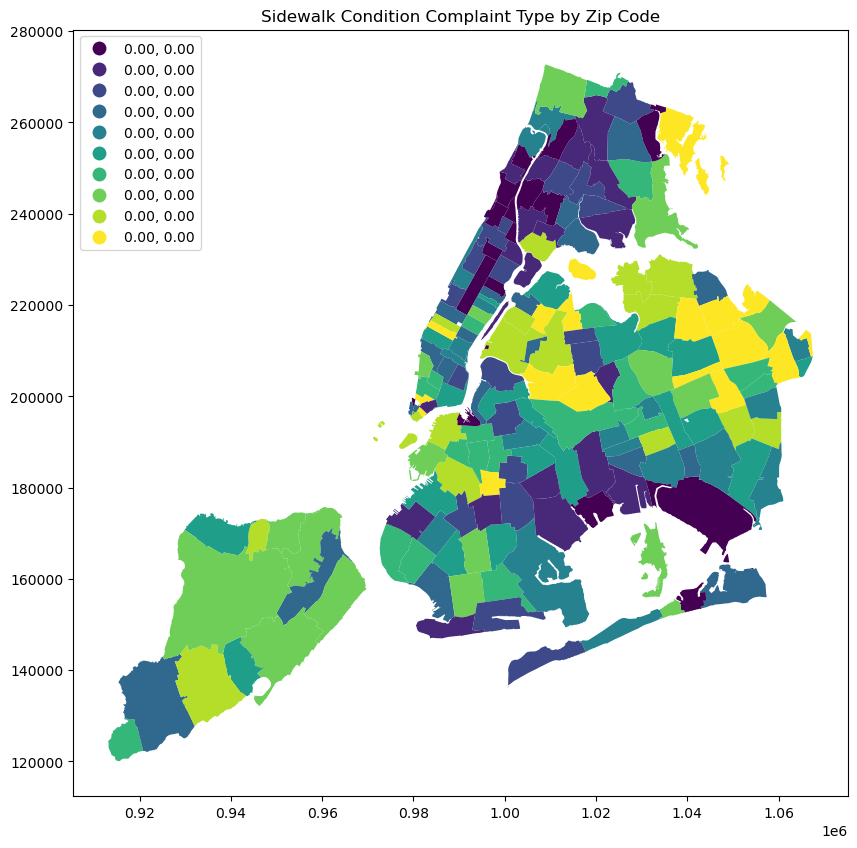

In [131]:
fig, ax = plt.subplots(1, figsize=(10,10))

zips_gdf.to_crs({'init':'epsg:2263'}).plot(ax=ax, column='Sidewalk Condition', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
ax.set_title('Sidewalk Condition Complaint Type by Zip Code')
plt.show()

C:\Users\omhai\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


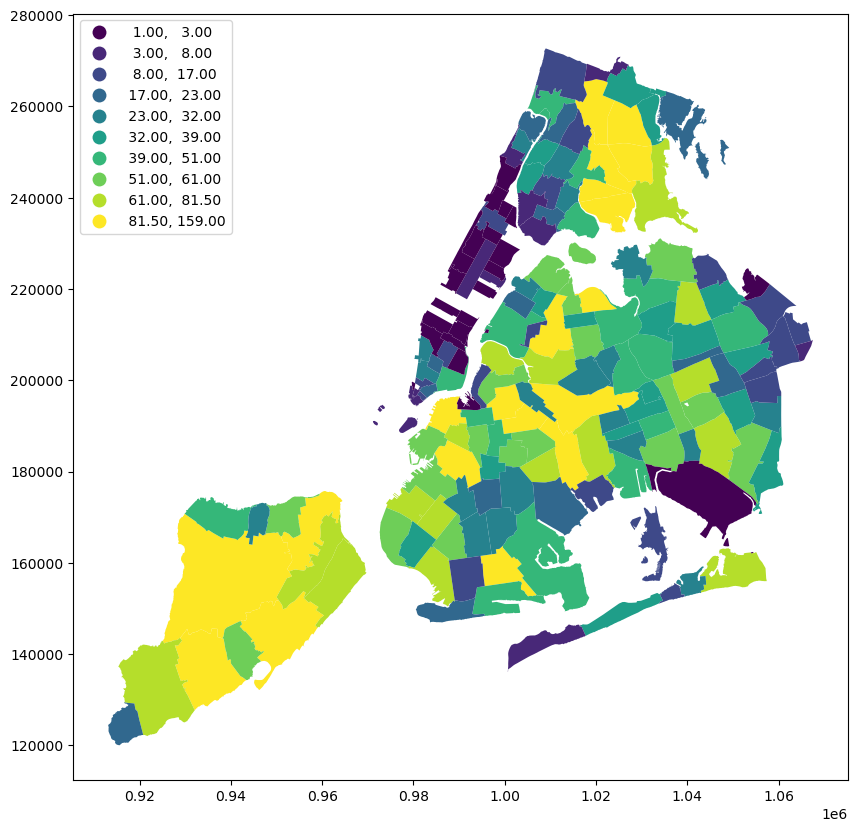

In [70]:
fig, ax = plt.subplots(1, figsize=(10,10))

zips_gdf.to_crs({'init':'epsg:2263'}).plot(ax=ax, column='Complaint Type', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
ax.set_title('Complaint Type by Zip Code')
plt.show()

In [41]:
#gdf.plot(column='complaint_type', cmap='YlOrRd', legend=True)

In [42]:
#gdf.to_csv("gdf.csv")